# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint

### Assignment: Implementation of Variational Autoencoders



## Learning Objectives

At the end of the experiment, you will be able to :

* understand variational autoencoders
* implementing variational autoenocders using celebA dataset

## Dataset



### Description

CelebFaces Attributes Dataset (CelebA) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter. CelebA has large diversities, large quantities, and rich annotations, including

* 10,177 number of identities,

* 202,599 number of face images, and

* 5 landmark locations, 40 binary attributes annotations per image.

The dataset can be employed as the training and test sets for the following computer vision tasks: face attribute recognition, face detection, landmark (or facial part) localization, and face editing & synthesis.

## Information

### What is dimensionality reduction?

In machine learning, dimensionality reduction is the process of reducing the number of features that describe some data. This reduction is done either by selection (only some existing features are conserved) or by extraction (a reduced number of new features are created based on the old features) and can be useful in many situations that require low dimensional data (data visualisation, data storage, heavy computation…). Although there exists many different methods of dimensionality reduction, we can set a global framework that is matched by most of these methods.


First, let’s call **encoder** the process that produce the
**“new features”** representation from the **“old features”** representation (by selection or by extraction) and **decoder** the reverse process.

Dimensionality reduction can then be interpreted as data compression where the encoder compress the data (from the initial space to the **encoded space**, also called **latent space**) whereas the decoder decompress them. Depending on the initial data distribution, the latent space dimension and the encoder definition, this compression can be lossy, meaning that a part of the information is lost during the encoding process and cannot be recovered when decoding.


<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/VAE_4.png" width=700px/>
</center>
<br><br>

**Principal components analysis (PCA)**

One of the dimensionality reduction method is principal component analysis (PCA). The idea of PCA is to build new independent features that are linear combinations of the old features and so that the projections of the data on the subspace defined by these new features are as close as possible to the initial data (in term of euclidean distance). In other words, PCA is looking for the best linear subspace of the initial space (described by an orthogonal basis of new features) such that the error of approximating the data by their projections on this subspace is as small as possible.


<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/VAE_1.png" width=500px/>
</center>
<br><br>


As shown in the above figure, $x$ is a matrix which becomes a low-dimensional matrix $c$ through a transformation $W$ . Because this process is linear, the transpose of $W$ can be used to restore an $\hat{x}$. PCA is to find a $W$ through SVD (singular value decomposition) so that the matrices $x$ and $x$ hat be as consistent as possible.
<br><br>

**Why we should use autoencoders?**

Data denoising and Dimensionality reduction for data visualization are considered as two main interesting practical applications of autoencoders.
Autoencoders can be used widely in **data compression** and transmission of compressed data. Autoencoders are a type of neural network that works in a self-supervised fashion. So in autoencoders, there are three main building blocks: **encoder**, **decoder**, and coder or **latent space**. So, first we feed the autoencoder with the data and then encoder encodes or simply extracts useful features of input data and stores it in latent space. And then the decoder does the same but in the opposite order.

<center>
<img src="https://miro.medium.com/max/720/1*W_SdpxG7NxhjB2-u3CZZXg.png" width=510px, height=280px/>
</center>
<br><br>


As data compression is one of the main advantages of autoencoders, it can be successfully implemented in **data transmission problems**. For example:


*   Imagine server uploads to internet only Latent Space Representation of the input image, depending on the request it gets and then, in the same manner, we download the Latent Space Representation to our mobile device and then we decode oour Latent Space Representation to get output result(for example image, video, audio files) even with better resolution/quality than it was in input.


*   **Denoising data:** Quality loss of data (images/audio/video) is one main problem/issue in data transmission. Due to connection status or bandwidth, data such as image and audio can lose in quality, therefore the problem of denoising data arises. Denoising data is one of the advantages of autoencoders.
<br><br>

**What are the autoencoders?**


Autoencoders are the type of unsupervised artificial neural networks. Autoencoder aims to learn representation for input data. Along with the reduction side, reconstruction is learned, where reconstruction side — decoder tries to reconstruct the input data from previously learned representation — Latent Space Representation with minimum loss. Usually, autoencoders consist of three-part: **encoder** — the part that includes input layer and hidden layer, **Latent Space** — this is where learned/compressed data is stored, and **decoder** — the part that starts from hidden layer and ends with output layer.


<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/VAE_2.png" width=500px/>
</center>
<br><br>


As shown in the above figure, $x$ is the input data and $(e(x))$ is the lower-dimension representation of input $x$ and $x’$ ($d(e(x))$ )is the reconstructed input data. The mapping of higher to lower dimensions can be linear or non-linear depending on the choice of the activation function.
The entire network is usually trained as a whole. The loss function is usually either the `mean-squared error` or `cross-entropy` between the output and the input, known as the **reconstruction loss**, which penalizes the network for creating outputs different from the input.


**The problem with classical autoencoders**

Standard autoencoders learn to generate compact representations and reconstruct their inputs well, but asides from a few applications like denoising autoencoders, they are fairly limited.

The only constraint on the latent vector representation for traditional autoencoders is that latent vectors should be easily decodable back into the original image. As a result, the latent space $Z$ can become disjoint and non-continuous. **Variational autoencoders** try to solve this problem by using a probabilistic model of latent representations which understands the underlying relations better, helping in more effective generalization.




### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2236974" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "7259357831" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()

notebook= "M4_AST_34_Variational_Autoencoders_C" #name of the notebook

def setup():

    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError
    else:
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError
    else:
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [4]:
import torch
import torchvision
import torch.nn as nn
import torch.utils as utils
import torch.nn.init as init
from torch.autograd import Variable
import torchvision.utils as v_utils
import torchvision.datasets as dset
import torchvision.transforms as transforms
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
plt.ion()
import torchvision.utils as vutils
import torch.nn.functional as F

### Defining Hyperparameters

In [5]:
epochs = 10
batch_size = 32
learning_rate = 0.0005
num_gpus = 1
image_size= 64

### Downloading the data

In [6]:
import os
import gdown
from zipfile import ZipFile
os.makedirs("celeba_gan")

url = "https://drive.google.com/uc?id=1O7m1010EJjLE5QxLZiM9Fpjs7Oj6e684"
output = "celeba_gan/data.zip"
gdown.download(url, output, quiet=True)

with ZipFile("celeba_gan/data.zip", "r") as zipobj:
    zipobj.extractall("celeba_gan")

### Loading the CelebA dataset

In [7]:
# Loading the dataset using ImageFolder
dataset = dset.ImageFolder(root="./celeba_gan",
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=1)

In [8]:
# Number of images in the dataset
len(dataset)

202599

### Initializing the CUDA



Every Tensor in PyTorch has a **to()** member function. Its job is to put the tensor on which it's called to a certain device whether it be the CPU or a certain GPU.

Input to the to function is a torch.device object which can be initialized with either of the following inputs.
* cpu for CPU
* cuda:0 for putting it on GPU number 0. Similarly, if your system has multiple GPUs, then the respective number would be considered while initializing the device.

Generally, whenever you initialize a Tensor, it’s put on the CPU. You should move it to the GPU to make the related calculation faster.


In [9]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected  : {device}')

Selected  : cuda


### Visualization of CelebA dataset images

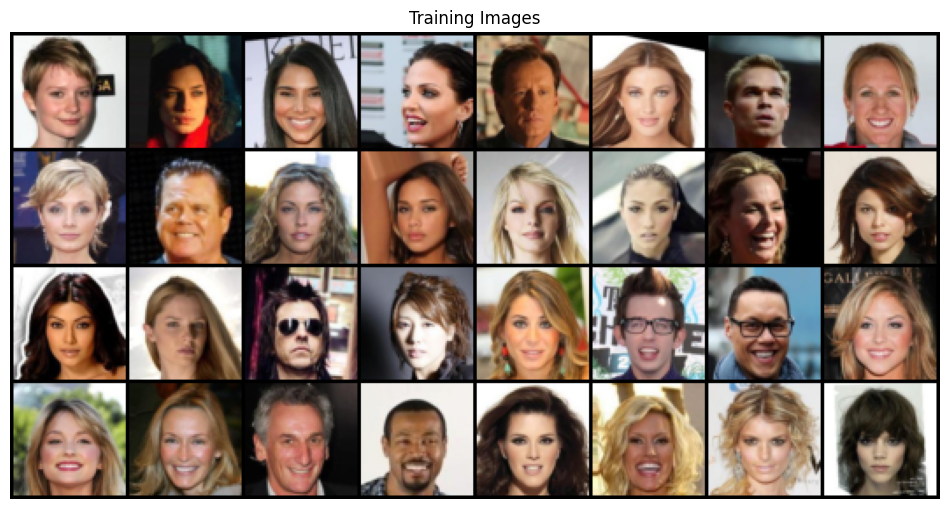

In [10]:
# Plot some training images
real_batch = next(iter(train_loader))
plt.figure(figsize=(12,12))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0][:60], padding=2, normalize=True),(1,2,0)));

### Variational Autoencoders(VAE)

Another important category of autoencoders was introduced in 2013 by Diederik Kingma and Max Welling and quickly became one of the most popular types of autoencoders: variational autoencoders.

They are quite different from all other autoencoders, in these particular ways:

* They are probabilistic autoencoders, i.e, that their outputs are partly determined by chance, even after training.

* They are generative autoencoders, i.e, that they can generate new instances that look like they were sampled from the training set.

<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/VAE_3.png" width=570px/>
</center>

**Encoder**

Encoder defines the approximate posterior distribution $q(z|x)$, which takes as input an observation and outputs a set of parameters for specifying the conditional distribution of the latent representation $z$. Here, simply model the distribution as a diagonal Gaussian, and the network outputs the **mean** and **log-variance** parameters of a factorized Gaussian. Output log-variance instead of the variance directly for numerical stability.


**Decoder**

Decoder defines the conditional distribution of the observation $q(x|z)$, which takes a latent sample as input and outputs the parameters for a conditional distribution of the observation. Model the latent distribution prior $P(z)$ as a unit Gaussian.

**Reparameterization trick**

To generate a sample $z$ for the decoder during training, we can sample from the latent distribution defined by the parameters outputted by the encoder, given an input observation $x$. However, this sampling operation creates a bottleneck because backpropagation cannot flow through a random node.

To address this, use a reparameterization trick. In our example, we approximate $z$ using the decoder parameters and another parameter $ε$ as follows:

<center>
<img src="https://miro.medium.com/max/1400/1*t_LDtUnroBccBykfOO_5jA@2x.jpeg" width=180px, height=30px/>
</center>




where $μ$ and $σ$ represent the mean and standard deviation of a Gaussian distribution respectively. They can be derived from the decoder output. The $ε$ can be thought of as a random noise used to maintain stochasticity of $z$. Generate $ε$ from a standard normal distribution $N(0,1)$. The latent variable $z$ is now generated by a function of $μ$, $σ$ and $ε$, which would enable the model to backpropagate gradients in the encoder through $μ$ and $σ$ respectively, while maintaining stochasticity through $ε$.

**How VAE works?**

The theoretical basis of VAE is the Gaussian mixture model (GMM). The difference is that our code is replaced by a continuous variable $z$, and $z$ follow standard normal distribution $N(0,1)$.

For each sample $z$, there will be two variables $μ$ and $σ$, which respectively determine the mean and standard deviation of the Gaussian distribution corresponding to $z$, and then the accumulation of all Gaussian distributions in the integration domain becomes the original distribution $P(x)$

<center>
<img src="https://miro.medium.com/max/720/1*mBEMgLQbdUnPkvUB7PAB8Q@2x.jpeg" width=250px, height=59px/>
</center>

Where $z~N(0,1)$, $x|z~N(μ(z)$, $σ(z))$, Since $P(z)$ is known, $P(x|z)$ is unknown, and $x|z~N(μ(z),σ(z))$. What we really need to solve is the expressions of $μ$ and $σ$, but $P(x)$ is so complex that μ and σ are difficult to be calculated, we need to introduce two neural networks(CNNs) to help us solve it.



**Note:**
1. Refer to the following [link](https://towardsdatascience.com/difference-between-autoencoder-ae-and-variational-autoencoder-vae-ed7be1c038f2) to understand more about VAE.

2. Refer to the following [link](https://medium.com/analytics-vidhya/variational-inference-in-context-of-variational-autoencoders-vaes-e96bfe859980) for the implementation of VAE.

#### Defining the CNN model for Variational Autoencoders

In [11]:
# Filter channel size
filter_size = 64

# Latent Variable
latent_dim = 512

In [12]:
# Defining the VAE class
class VAE(nn.Module):
    def __init__(self):
      super(VAE,self).__init__()
      # Define the convolutional layers for encoder and decoder
      # Encoder part of the variational autoencoders
      self.encode_layer = nn.Sequential(OrderedDict([
                        ('conv1',nn.Conv2d(3, filter_size, kernel_size = 4, stride = 2, padding = 1)),
                        ('bn1',nn.BatchNorm2d(filter_size)),
                        ('relu1',nn.ReLU(0.2)),
                        ('conv2',nn.Conv2d(filter_size, filter_size * 2, kernel_size = 4, stride = 2, padding = 1)),
                        ('bn2',nn.BatchNorm2d(filter_size * 2)),
                        ('relu2',nn.ReLU(0.2)),
                        ('conv3', nn.Conv2d(filter_size * 2, filter_size*4,  kernel_size = 4, stride = 2, padding = 1)),
                        ('bn3', nn.BatchNorm2d(filter_size * 4)),
                        ('relu3', nn.ReLU(0.2))
        ]))
      # Decoder part of the variational autoencoders
      self.decode_layer = nn.Sequential(OrderedDict([
                    ('deconv1', nn.ConvTranspose2d(filter_size*4, filter_size*2, kernel_size = 4, stride = 2, padding = 1)),
                    ('deconv1_bn', nn.BatchNorm2d(filter_size * 2)),
                    ('leakyrelu1', nn.LeakyReLU(0.2)),
                    ('deconv2', nn.ConvTranspose2d(filter_size * 2, filter_size, kernel_size = 4, stride = 2, padding = 1)),
                    ('deconv2_bn', nn.BatchNorm2d(filter_size)),
                    ('leakyrelu1', nn.LeakyReLU(0.2)),
                    ('deconv3', nn.ConvTranspose2d(filter_size, 3, kernel_size = 4, stride = 2, padding = 1)),
                    ('tanh3', nn.Tanh())
      ]))
      # Fully connected layers
      self.fc1 = nn.Linear(filter_size * 4 * 8 * 8, latent_dim)
      self.fc2 = nn.Linear(filter_size * 4 * 8 * 8, latent_dim)
      self.d1 = nn.Linear(latent_dim, filter_size * 4 * 8 * 8)
      self.z_size = latent_dim
      self.d_max = filter_size * 4

    def encode(self,x):
      """Defines the encoder's layers.
      Args:
          inputs -- batch from the dataset
          latent_dim -- dimensionality of the latent space

      Returns:
          mu -- learned mean
          sigma -- learned standard deviation (log variance)
       """
      x = self.encode_layer(x)
      x = x.view(x.shape[0], -1)
      mu = self.fc1(x)
      log_var = self.fc2(x)
      return mu, log_var

    # Sampling function
    # Define the function to provide the Gaussian noise input along with the mean (mu) and standard deviation (sigma)
    # of the encoder's output defined the equation above to combine these
    def reparameterize(self, mu, log_var):
      # Standard deviation
      std = torch.exp(0.5 * log_var)
      # define the epsilon values with randn
      eps = torch.randn_like(std)

      return eps.mul(std).add_(mu)

    def decode(self,x):
      """Defines the decoder layers.
            Args:
              inputs -- output of the encoder
              conv_shape -- shape of the features before flattening

            Returns:
              tensor containing the decoded output
      """
      x = x.view(x.shape[0], self.z_size)
      x = self.d1(x)
      x = x.view(x.shape[0], self.d_max, 8, 8)
      x = self.decode_layer(x)
      return x

    # Forward funcion of the model
    def forward(self, x):
      """Defines the VAE model
          Args:
            encoder -- the encoder model
            decoder -- the decoder model
        Returns:
            the complete VAE model
      """
      mu, log_var = self.encode(x)
      mu = mu.squeeze()
      log_var = log_var.squeeze()
      z = self.reparameterize(mu, log_var)
      return self.decode(z.view(-1, self.z_size, 1, 1)), mu, log_var

### Create an Instance for the model

In [13]:
vae = VAE().cuda()
print(vae)

VAE(
  (encode_layer): Sequential(
    (conv1): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
  )
  (decode_layer): Sequential(
    (deconv1): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (deconv1_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (leakyrelu1): LeakyReLU(negative_slope=0.2)
    (deconv2): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding

### Loss Function & Optimizer

**VAE Loss Function**

The cost function is composed of two parts.

* The first is the usual **reconstruction loss** here, we are using Mean Square Error loss function that pushes the autoencoder to reproduce its inputs.

* The second is the latent loss that pushes the autoencoder to have codings that look as though they were sampled from a simple Gaussian distribution.

The latent loss can be computed using Equation:

Variational autoencoder’s latent loss,

$$L = -\frac{1}{2}\Sigma_{i=1}^{n}[1 + log(\sigma_i^2) - \sigma_i^2 - \mu_i^2]$$

where, $L$ is the latent loss, $n$ is the codings’ dimensionality, and $μ_i$ and $σ_i$ are the mean and standard deviation of the $i^{th}$ component of the codings. The vectors $μ$ and $σ$ are output by the encoder, as shown in
the above figure.

A common tweak to the variational autoencoder’s architecture is to make the encoder output $γ = log(σ^2)$ rather than $σ$. The latent loss can then be computed as:

$$L = -\frac{1}{2}\Sigma_{i=1}^{n}[1 + \gamma_i - exp(\gamma_i) - \mu_i^2]$$

This divergence is a way to measure how “different” two probability distributions are from each other. By minimizing it, the distributions will come closer to the origin of the latent space.

Hence the training loss of VAE is defined as the sum of these the reconstruction loss and the latent loss

<center>
$ Loss = reconstruction \ loss (MSE) + latent \ loss$
</center>

This approach is more numerically stable and speeds up training.



In [14]:
def loss_function(recon_x, x, mu, logvar):
        """ Computes the reconstruction loss (MSE) and Kullback-Leibler Divergence (KLD)
          Args:
            inputs -- batch from the dataset
            outputs -- output of the Sampling layer
            mu -- mean
            sigma -- standard deviation

          Returns:
            KLD loss + reconstructed loss
        """
        kld_weight = 1
        recons_loss = F.mse_loss(recon_x, x, reduction="sum")
        kld_loss = torch.sum(-0.5 * torch.sum(1 + logvar - mu ** 2 - logvar.exp(), dim = 1), dim = 0)
        loss = recons_loss + kld_weight * kld_loss
        return loss

# Defining the adam optimizer
optimizer = torch.optim.Adam(vae.parameters(), lr = learning_rate, betas=(0.5, 0.999), weight_decay=1e-5)

### Train the VAE Model

**Note:** The VAE model takes around 1 hour for training

In [15]:
# First switch the module mode to vae.train() so that new weights can be learned after every epoch.
vae.train()

# Iterate through the number of epochs
for epoch in range(epochs):
    running_train_loss = 0

    # Get images from trainloader
    for idx, data in enumerate(train_loader):

        # Converting the data to GPU for faster execution
        image = Variable(data[0]).to(device)

        # zero out the gradients from the preivous step
        optimizer.zero_grad()

        # Do forward pass on the current mini batch
        recon_images, mu, log_var = vae(image)

        # Compute loss on the current mini batch
        loss = loss_function(recon_images, image, mu, log_var)

        # Do backward pass. That is compute all the gradients for the current minibatch
        loss.backward()

        # Update the parameters using the gradients with the learning rate
        optimizer.step()

        running_train_loss += loss.item()

    # Calculate average training loss value
    train_loss_value = running_train_loss/len(train_loader.dataset)
    print("Epoch[{}/{}] Loss (Reconstruction + KLD): {:.3f}".format(epoch+1, epochs, train_loss_value))

Epoch[1/10] Loss (Reconstruction + KLD): 884.437


KeyboardInterrupt: ignored

### Evaluating the VAE Model

In [16]:
# Set the model model to .eval
vae.eval()

def to_image(x):
    x = x.clamp(0, 1)
    return x

def show_image(img):
    img = to_image(img)
    img = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))

In [18]:
# Evaluating the model by taking grid of images from training set and passing to the model and reconstructing the images back
def visualise_output(images, model):
    with torch.no_grad():

        # Converting images to gpu
        images = images.to(device)

        # Forward pass
        images, _, _ = model(images)
        images = images.cpu()

        # Making a grid of images for visualization
        images = to_image(images)
        np_imagegrid = torchvision.utils.make_grid(images[0:30], 10, 5).numpy()
        plt.imshow(np.transpose(np_imagegrid, (1, 2, 0)))
        plt.show()

# images, _ = iter(train_loader).next()

Original images


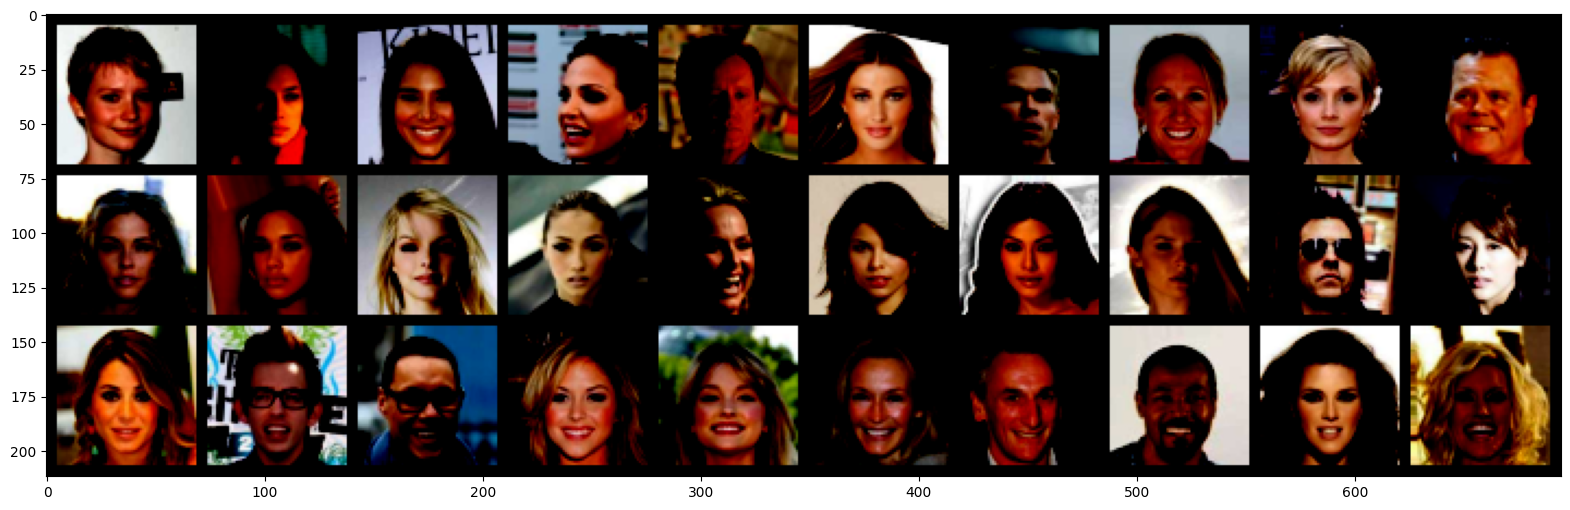

VAE reconstruction:


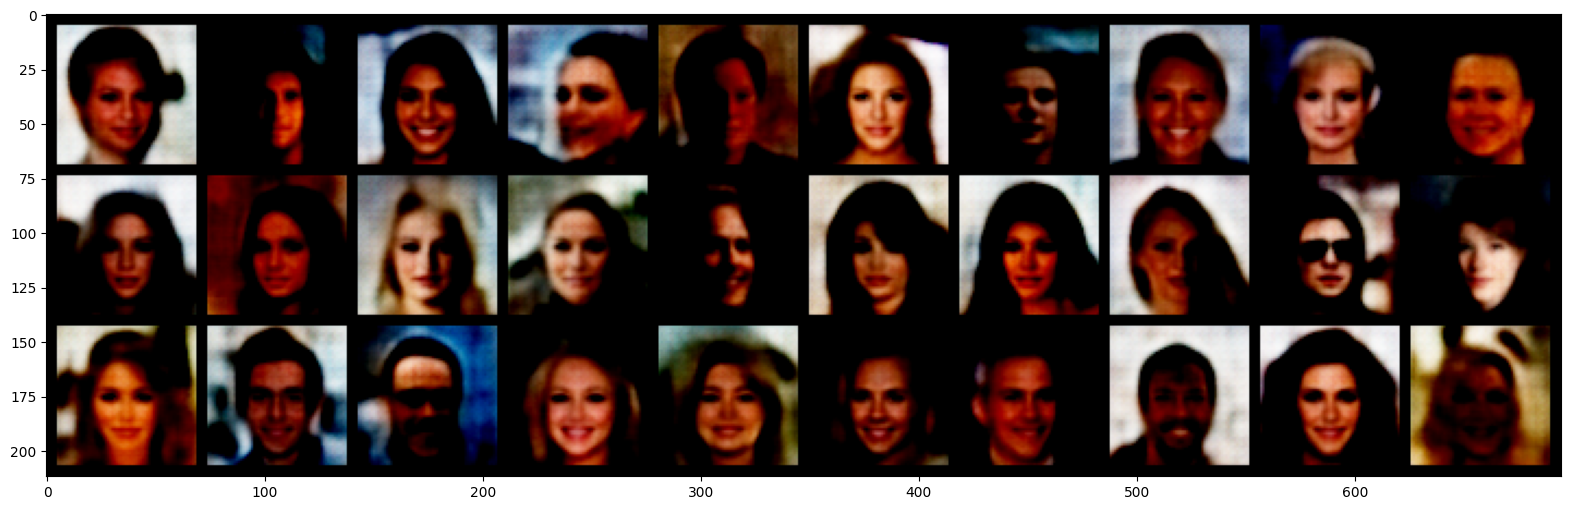

In [19]:
# First visualise the original images
print('Original images')
fig = plt.figure(figsize=(20, 6))
# show_image(torchvision.utils.make_grid(images[0:30], 10, 5))
show_image(torchvision.utils.make_grid(real_batch[0][:30], 10, 5))

plt.show()

# Reconstruct and visualise the images using the vae model
print('VAE reconstruction:')
fig = plt.figure(figsize=(20, 6))
# visualise_output(images, vae)
visualise_output(real_batch[0][:30], vae)

### Please answer the questions below to complete the experiment:




#### Consider the following statements about Autoencoders and answer Q1.


A. The Encoder learns to compress (reduce) the input data into an encoded representation.

B. The decoder learns to reconstruct the original data from the encoded representation to be as close to the original input as possible.

C. The Bottleneck/Latent space is the layer that contains the compressed representation of the input data.

D. Reconstruction loss(MSE) measures how well the decoder is performing, i.e. measures the difference between the encoded and decoded vectors, lesser the better.

In [20]:
#@title Q.1. Which of the above statements is/are true regarding Autoencoders?
Answer1 = "A, B, C and D" #@param ["","Only A", "Only C", "Only D", "Only A and B","Only C and D", "Only B and D", "A, B, C and D"]


In [21]:
#@title Q.2. ELBO (evidence lower bound) is a key concept in Variational Bayesian Methods. It transforms inference problems, which are always intractable, into optimization problems that can be solved with, for example, gradient-based methods.
Answer2 = "TRUE" #@param ["","TRUE", "FALSE"]


In [22]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [23]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "None" #@param {type:"string"}


In [24]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [25]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [26]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [27]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2755
Date of submission:  23 Sep 2023
Time of submission:  11:39:34
View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions
